# Load old simulation data

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
from typing import Tuple, Callable
import os
import shutil
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sithom.plot import plot_defaults, label_subplots
from sithom.time import timeit
from sithom.place import Point
from sithom.misc import in_notebook
from src.constants import DATA_PATH, FIGURE_PATH
from src.models.generation import ImpactSymmetricTC, Holland08
from src.conversions import si_ify, knots_to_ms
from src.constants import NEW_ORLEANS, DATA_PATH, NO_BBOX

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(
/Users/simon/new-orleans/env/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
paths = [
    "emulation_angle_pos_matern32_variance",
    "emulation_angle_pos_matern32_ent",
    "emulation_angle_pos_Mattern32",
    "emulation_angle_pos_Mattern52",
    "emulation_angle_pos_big",
]

In [4]:
os.listdir(os.path.join(DATA_PATH, "emulation_angle_pos_big"))

['61',
 '95',
 '59',
 '92',
 '66',
 '104',
 '50',
 '68',
 '103',
 '57',
 '32',
 '35',
 '102',
 '69',
 '56',
 '105',
 '51',
 '58',
 '67',
 '93',
 '94',
 '60',
 '34',
 '33',
 'data.nc',
 '20',
 '18',
 '27',
 '9',
 '0',
 '11',
 '7',
 '29',
 '16',
 '129',
 '42',
 '89',
 '116',
 '45',
 '111',
 '73',
 '118',
 '87',
 '127',
 '80',
 '74',
 '120',
 '6',
 '28',
 '17',
 '1',
 '10',
 '19',
 '26',
 '8',
 '21',
 '75',
 '81',
 '121',
 '119',
 '86',
 '72',
 '126',
 '44',
 '110',
 '43',
 '128',
 '88',
 '117',
 '38',
 '36',
 '31',
 '91',
 '65',
 '62',
 '96',
 '109',
 '100',
 '54',
 '107',
 '98',
 '53',
 '30',
 '37',
 '39',
 '106',
 '99',
 '52',
 '101',
 '55',
 '97',
 '108',
 '63',
 '64',
 '90',
 '46',
 '79',
 '112',
 '41',
 '115',
 '83',
 '77',
 '123',
 '48',
 '70',
 '84',
 '124',
 '24',
 '23',
 '4',
 '15',
 '3',
 '12',
 '85',
 '71',
 '125',
 '76',
 '82',
 '49',
 '122',
 '40',
 '114',
 '47',
 '113',
 '78',
 '2',
 '13',
 '5',
 '14',
 '22',
 '25']

In [5]:
ds_list = []
for path in paths:
    file_name = os.path.join(DATA_PATH, path, "data.nc")
    path_exists = os.path.exists(file_name)
    if path_exists:
        ds = xr.open_dataset(file_name)
        ds_list.append(ds[["init_x", "init_y"]])
ds_comb = xr.concat(ds_list, dim="inum")
ds_comb

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:  (inum: 600, var: 2)
Coordinates:
  * var      (var) object 'x1' 'x2'
Dimensions without coordinates: inum
Data variables:
    init_x   (inum, var) float32 8.55 2.849 -22.95 -1.519 ... 1.458 -56.7 -1.506
    init_y   (inum) float64 0.8873 2.101 3.554 3.479 ... 6.26 0.628 1.329 4.091
Attributes:
    description:  Training Data

Text(0, 0.5, 'Position [$^{\\circ}$E]')

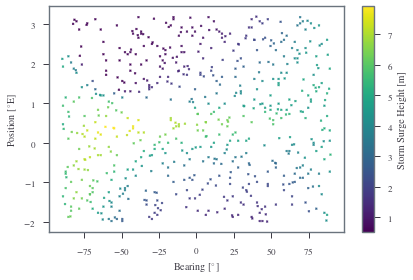

In [6]:
plot_defaults()
plt.scatter(ds_comb["init_x"].isel(var=0).values, ds_comb["init_x"].isel(var=1).values, s=5, c=ds_comb["init_y"].values)
plt.colorbar(label="Storm Surge Height [m]")
plt.xlabel("Bearing [$^{\circ}$]")
plt.ylabel("Position [$^{\circ}$E]")

In [7]:
os.listdir(os.path.join(DATA_PATH))

['sea_surface_temperature.nc',
 'mult3.25',
 'exp_h80',
 'kat_emulation',
 'katex-0.nc',
 'emulation_angle_pos_matern32_variance',
 'kat_xn',
 'katrina-0.nc',
 'mean_sea_level_pressure.nc',
 'kat_rmax',
 'katrina_water_era5.nc',
 'mult0.5',
 'fort.224.nc',
 'significant_height_of_combined_wind_waves_and_swell.nc',
 'emu_ex',
 'katrina_example_input.nc',
 '.DS_Store',
 'mult2.25',
 'emulation_angle_pos_poi',
 'fort.221.nc',
 'IBTrACS.ALL.v04r00.nc',
 'katrina-1.nc',
 'katrina_tides.nc',
 'katex.fort.221',
 'katrina_era5.nc',
 'emulation_angle_pos_mves',
 'katd_h08',
 'lhc',
 'mult1.75',
 'mult1',
 'emu2_ex',
 'mult3.5',
 'kate_h08',
 'mult0.75',
 'fort.218',
 'emu3_ex',
 'kat_pc',
 'kat_angle',
 '10m_v_component_of_wind.nc',
 'emu_angle_position',
 'total_precipitation.nc',
 'fort.221',
 'emulation_angle_pos_Mattern52',
 'fort.217',
 'emulation_angle_pos_big',
 'mult3.75',
 'README.md',
 'IBTrACS_gom_landings.nc',
 '2m_temperature.nc',
 'fort.218.nc',
 'mean_wave_period.nc',
 '10m_u_com

In [8]:
ds_comb["init_y"].max(dim="inum")

<xarray.DataArray 'init_y' ()>
array(7.91581181)

In [9]:
ds_list = []
for path in paths:
    file_name = os.path.join(DATA_PATH, path, "data.nc")
    path_exists = os.path.exists(file_name)
    if path_exists:
        ds = xr.open_dataset(file_name)
        ds_list.append(ds[["active_x", "active_y"]])
ds_act = xr.concat(ds_list, dim="anum")
ds_act

<xarray.Dataset>
Dimensions:   (anum: 190, var: 2)
Coordinates:
  * var       (var) object 'x1' 'x2'
Dimensions without coordinates: anum
Data variables:
    active_x  (anum, var) float64 90.0 3.2 -57.04 3.2 ... -0.1284 -82.82 -0.223
    active_y  (anum) float64 4.272 0.5898 4.822 1.288 ... 5.153 4.085 5.954
Attributes:
    description:  Training Data

Text(0, 0.5, 'Position [$^{\\circ}$E]')

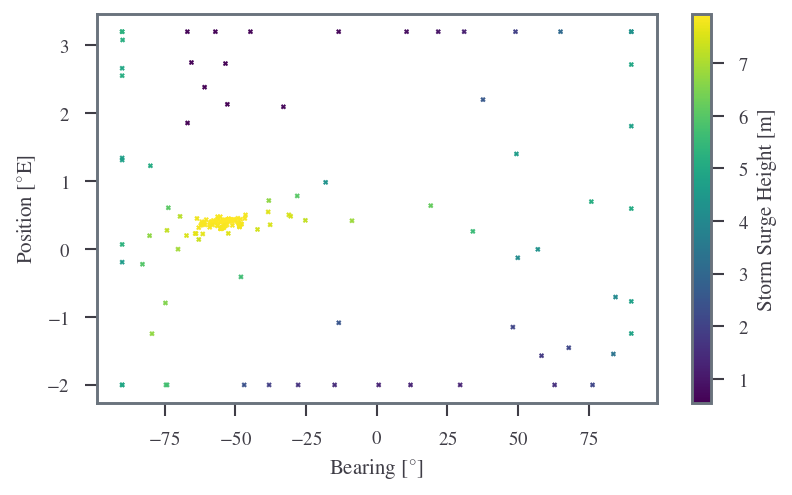

In [10]:
plot_defaults()
plt.scatter(ds_act["active_x"].isel(var=0).values, 
            ds_act["active_x"].isel(var=1).values, 
            s=5, 
            c=ds_act["active_y"].values)
plt.colorbar(label="Storm Surge Height [m]")
plt.xlabel("Bearing [$^{\circ}$]")
plt.ylabel("Position [$^{\circ}$E]")

In [11]:
ds_act["active_y"].max(dim="anum")

<xarray.DataArray 'active_y' ()>
array(7.94099995)

Text(0, 0.5, 'Position [$^{\\circ}$E]')

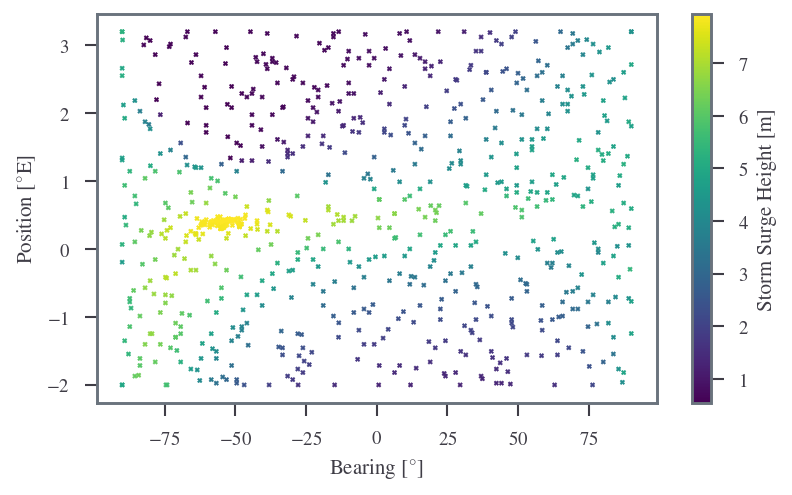

In [12]:
plot_defaults()
plt.scatter(ds_comb["init_x"].isel(var=0).values, ds_comb["init_x"].isel(var=1).values, s=5, c=ds_comb["init_y"].values)
plt.scatter(ds_act["active_x"].isel(var=0).values, 
            ds_act["active_x"].isel(var=1).values, 
            s=5, 
            c=ds_act["active_y"].values)
plt.colorbar(label="Storm Surge Height [m]")
plt.xlabel("Bearing [$^{\circ}$]")
plt.ylabel("Position [$^{\circ}$E]")

In [13]:
anum = np.argmax(ds_act["active_y"].values)
ds_act.isel(anum=anum)

<xarray.Dataset>
Dimensions:   (var: 2)
Coordinates:
  * var       (var) object 'x1' 'x2'
Data variables:
    active_x  (var) float64 -52.67 0.4198
    active_y  float64 7.941
Attributes:
    description:  Training Data

In [14]:
inum = np.argmax(ds_comb["init_y"].values)
ds_comb.isel(inum=inum)

<xarray.Dataset>
Dimensions:  (var: 2)
Coordinates:
  * var      (var) object 'x1' 'x2'
Data variables:
    init_x   (var) float32 -55.35 0.379
    init_y   float64 7.916
Attributes:
    description:  Training Data

## So current best guesses:

Latin hypercube -55.35 $^{\circ}$, 0.379 $^{\circ}$E --> 7.916 m

Active Learning -52.67 $^{\circ}$, 0.4198 $^{\circ}$E --> 7.941 m


## Verification Curve

In [15]:
ds_comb

<xarray.Dataset>
Dimensions:  (inum: 600, var: 2)
Coordinates:
  * var      (var) object 'x1' 'x2'
Dimensions without coordinates: inum
Data variables:
    init_x   (inum, var) float32 8.55 2.849 -22.95 -1.519 ... 1.458 -56.7 -1.506
    init_y   (inum) float64 0.8873 2.101 3.554 3.479 ... 6.26 0.628 1.329 4.091
Attributes:
    description:  Training Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_data = ds_comb.init_x.values

In [18]:
x_data.shape

(600, 2)

In [22]:
y_data = ds_comb.init_y.values.reshape((600, 1))

In [23]:
y_data.shape

(600, 1)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.33, random_state=42
)

In [86]:
import GPy
from GPy.kern import Linear, RBF, Matern32, Matern52
from GPy.models import GPRegression

In [26]:
model_gpy = GPRegression(
            x_train,
            y_train,
            RBF(2, 1),
        )
model_gpy.optimize()

In [27]:
model_gpy

GP_regression.,value,constraints,priors
rbf.variance,9.723879208156463,+ve,
rbf.lengthscale,2.070306314701057,+ve,
Gaussian_noise.variance,0.3708924867019873,+ve,


In [29]:
y_pred, y_var = model_gpy.predict(x_test)
y_unc = np.sqrt(y_pred)

 /var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_71738/540340113.py:2: RuntimeWarning:invalid value encountered in sqrt


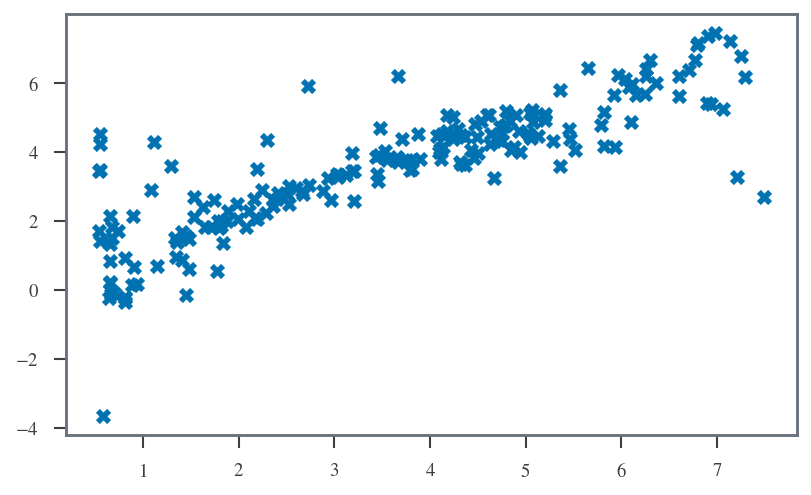

In [31]:
plt.scatter(y_test, y_pred)

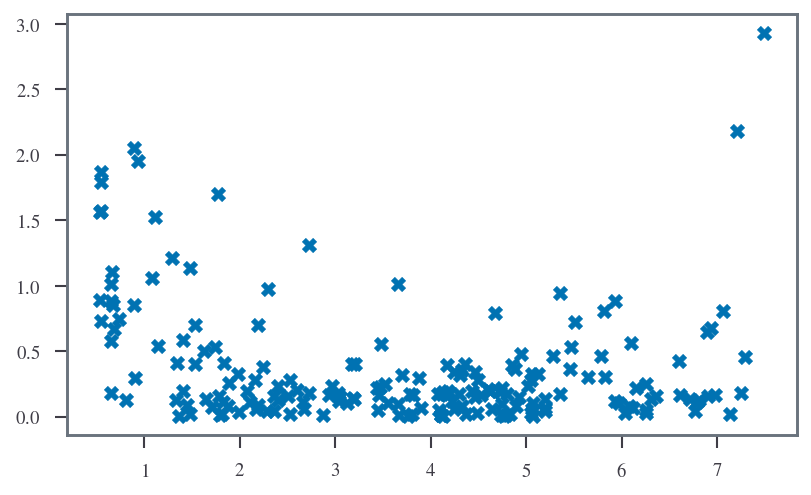

In [41]:
plt.scatter(y_test, np.abs(y_pred-y_test)/y_unc)

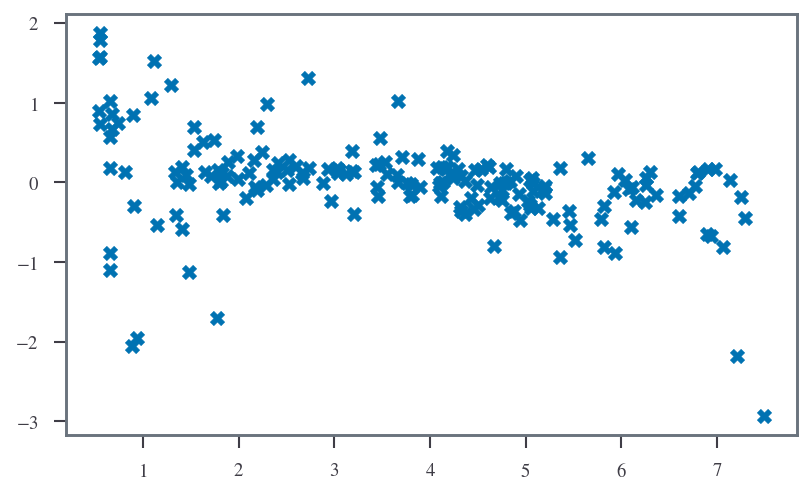

In [42]:
plt.scatter(y_test, (y_pred-y_test)/y_unc)

In [37]:
import numpy as np
import numpy.ma as ma

In [38]:
ma.corrcoef(y_test, y_pred)

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float64)

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
r2_score(y_test, y_pred)

0.7056323939427175

In [44]:
mean_squared_error(y_test, y_pred)

1.1038276526155093

In [58]:
np.sum(np.square((y_pred - y_test) / y_unc)) / len(y_pred)

nan

(array([ 1.,  2.,  2.,  2., 13., 52., 95., 12.,  6.,  5.]),
 array([-2.93018748, -2.45005902, -1.96993057, -1.48980211, -1.00967366,
        -0.52954521, -0.04941675,  0.4307117 ,  0.91084015,  1.39096861,
         1.87109706]),
 <BarContainer object of 10 artists>)

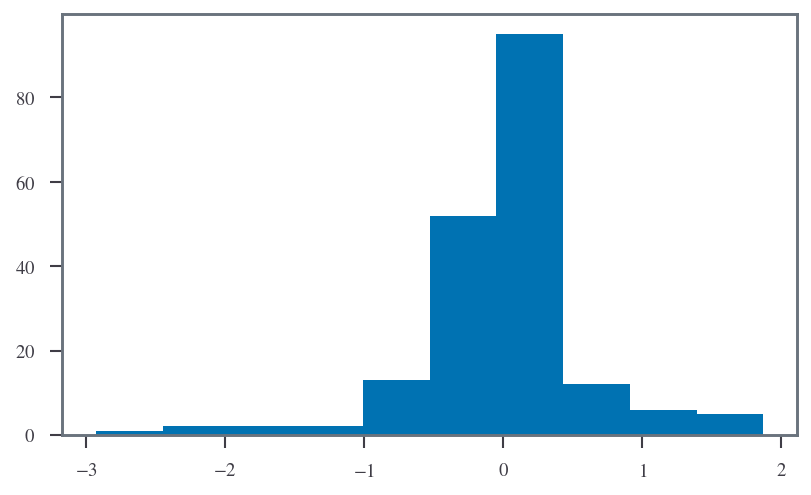

In [64]:
norm_pred = ((y_pred - y_test) / y_unc)
plt.hist(norm_pred)

In [69]:
np.std(norm_pred)

nan

In [78]:
import scipy

In [85]:
fp =  norm_pred[~np.isnan(norm_pred)]
std = np.std(fp)
mean = np.mean(fp)
skew = scipy.stats.skew(fp)
kurt = scipy.stats.kurtosis(fp) - 3

len(fp), mean, std, skew, kurt

(190,
 0.0009674783404914444,
 0.5952568855281742,
 -0.7372136113529749,
 2.3000547511120413)

In [55]:
y_var

array([[0.64247698],
       [0.69876421],
       [0.84743324],
       [0.58265582],
       [0.93953355],
       [0.75942168],
       [0.9549795 ],
       [0.62479807],
       [0.56894886],
       [0.66363571],
       [0.51602173],
       [1.01298515],
       [0.75295538],
       [1.78215887],
       [0.73928093],
       [0.65860237],
       [0.65208509],
       [3.9965025 ],
       [1.21927616],
       [0.61045186],
       [0.64845709],
       [1.50820075],
       [0.63621139],
       [1.09205618],
       [0.81485332],
       [0.70471533],
       [0.65964634],
       [0.99308052],
       [0.54074513],
       [0.70446086],
       [0.61344636],
       [0.82577006],
       [1.03027171],
       [0.55789501],
       [1.32992653],
       [0.64094976],
       [0.81642804],
       [1.01641485],
       [0.49899403],
       [1.2755389 ],
       [0.60116863],
       [0.93036594],
       [0.54811082],
       [1.28485055],
       [1.03792322],
       [0.63175521],
       [0.52584714],
       [0.730

In [56]:
len(y_pred)

198

In [57]:
len(y_test, seed=42)

198

In [89]:
def r2_func(kernel=RBF, seed=42, test_size=0.33):
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, y_data, test_size=test_size, random_state=seed,
    )
    model_gpy = GPRegression(
            x_train,
            y_train,
            kernel(2, 1),
        )
    model_gpy.optimize()
    y_pred, y_var = model_gpy.predict(x_test)
    # y_unc = np.sqrt(y_pred)
    return r2_score(y_test, y_pred)

0.7653014159830659

In [90]:
r2_func(kernel=Matern52)

0.7653014159830659

In [91]:
r2_func(kernel=Matern32)

0.7846061528100263

In [92]:
r2_func(kernel=RBF)

0.7056323939427175

In [110]:
def r2_mean_std(kernel=RBF, test_size=0.33):
    r2_list = []
    for seed in range(0, 10):
        r2_list.append(r2_func(kernel=kernel, seed=seed, test_size=test_size))

    return np.mean(r2_list), np.std(r2_list)


def sweep_test_size(sizes: np.ndarray, kernel=RBF):
    mean_list = []
    std_list = []
    for size in sizes.tolist():
        mean, std = r2_mean_std(kernel=kernel, test_size=size)
        mean_list.append(mean)
        std_list.append(std)
    return np.array(mean_list), np.array(std_list)        

In [111]:
sizes = np.array([0.05, 0.1, 0.2, 0.25, 0.3, 0.35,  0.4, 0.5])
rbf_tuple = sweep_test_size(sizes, kernel=RBF)
m32_tuple = sweep_test_size(sizes, kernel=Matern32)
m52_tuple = sweep_test_size(sizes, kernel=Matern52)

(0.05, 0.5)

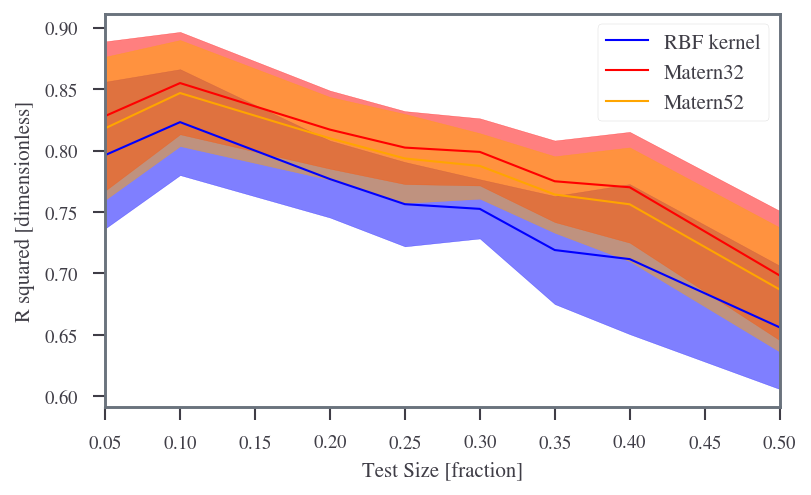

In [119]:
plt.plot(sizes, rbf_tuple[0], label="RBF kernel", color="blue")
plt.fill_between(sizes, rbf_tuple[0] + rbf_tuple[1], rbf_tuple[0] - rbf_tuple[1], color="blue", alpha=0.5)

plt.plot(sizes, m32_tuple[0], label="Matern32", color="red")
plt.fill_between(sizes, m32_tuple[0] + m32_tuple[1], m32_tuple[0] - m32_tuple[1], color="red", alpha=0.5)

plt.plot(sizes, m52_tuple[0], label="Matern52", color="orange")
plt.fill_between(sizes, m52_tuple[0] + m52_tuple[1], m52_tuple[0] - m52_tuple[1], color="orange", alpha=0.5)

plt.legend()
plt.xlabel("Test Size [fraction]")
plt.ylabel("R squared [dimensionless]")
plt.xlim(sizes.min(), sizes.max())

In [100]:
r2_mean_std(test_size=0.5)

(0.6562445519064969, 0.05014888911376649)

In [114]:
sizes.min()

0.05

In [118]:
x_data

array([[  8.550003  ,   2.849     ],
       [-22.95      ,  -1.5189999 ],
       [ 61.65      ,  -0.27099997],
       ...,
       [-45.9       ,   2.238     ],
       [-31.5       ,   1.458     ],
       [-56.7       ,  -1.5059999 ]], dtype=float32)

(0.05, 0.5)

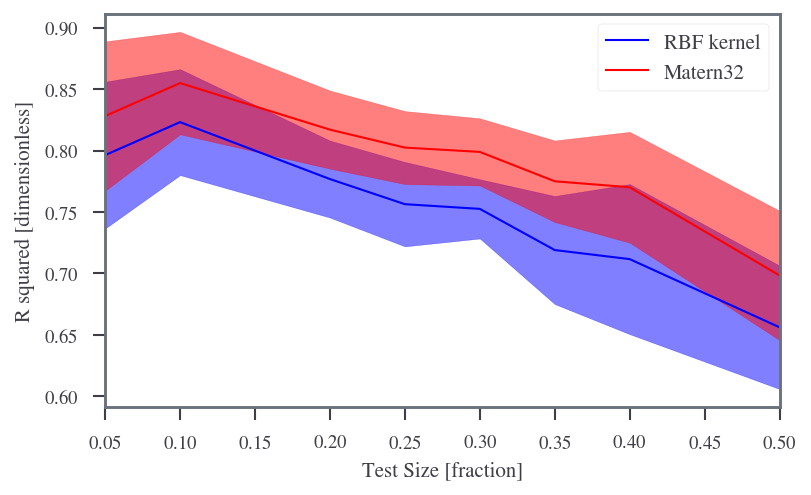

In [120]:
plt.plot(sizes, rbf_tuple[0], label="RBF kernel", color="blue")
plt.fill_between(sizes, rbf_tuple[0] + rbf_tuple[1], rbf_tuple[0] - rbf_tuple[1], color="blue", alpha=0.5)

plt.plot(sizes, m32_tuple[0], label="Matern32", color="red")
plt.fill_between(sizes, m32_tuple[0] + m32_tuple[1], m32_tuple[0] - m32_tuple[1], color="red", alpha=0.5)

plt.legend()
plt.xlabel("Test Size [fraction]")
plt.ylabel("R squared [dimensionless]")
plt.xlim(sizes.min(), sizes.max())

In [137]:
def r2_func_new(kernel=RBF, seed=42, size=0.33):
    in_full_x = x_data[:-200]
    in_full_y = y_data[:-200]
    hold_out_x = x_data[-200:]
    hold_out_y = y_data[-200:]

    x_train, x_test, y_train, y_test = train_test_split(
        in_full_x, in_full_y, test_size=size, random_state=seed,
    )
    model_gpy = GPRegression(
            x_test,
            y_test,
            kernel(2, 1),
        )
    model_gpy.optimize()
    y_pred, y_var = model_gpy.predict(hold_out_x)
    return r2_score(hold_out_y, y_pred)

In [121]:
len(x_data)

600

In [125]:
x_data[:-200].shape

(400, 2)

In [126]:
x_data[-200:].shape

(200, 2)

In [128]:
in_full = x_data[:-200]
hold_out = x_data[-200:]

In [129]:
in_full.shape

(400, 2)

In [149]:
def r2s_maker(sizes, kernel=RBF):
    r2s=[]
    for size in sizes.tolist():
        r2s.append(r2_func_new(kernel=kernel, size=size))
    return np.array(r2s)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


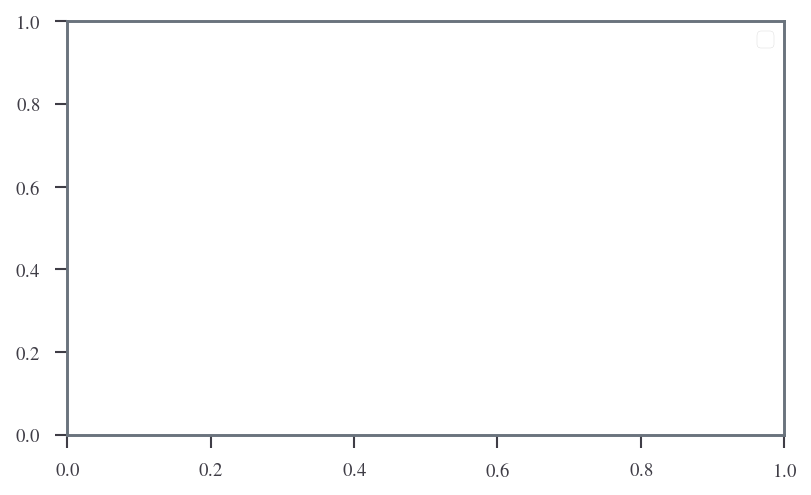

In [153]:
sizes = np.linspace(0.1, 0.9, num=20)
rbfr2 = r2s_maker(sizes, kernel=RBF)
m32r2 = r2s_maker(sizes, kernel=Matern32)
m52r2 = r2s_maker(sizes, kernel=Matern52)

Text(0.5, 0, 'Fraction of Training Data to Use')

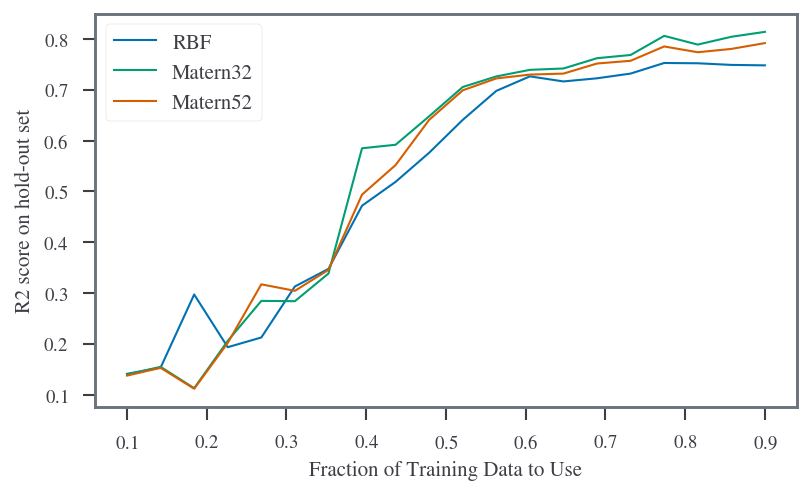

In [155]:
plt.plot(sizes, rbfr2, label="RBF")
plt.plot(sizes, m32r2, label="Matern32")
plt.plot(sizes, m52r2, label="Matern52")
plt.legend()
plt.ylabel("R2 score on hold-out set")
plt.xlabel("Fraction of Training Data to Use")